### Question 1: Which area has the highest and lowest crime rate?

This Question will explore:

- Areas with the highest and lowest Crime.
- Which commnunity has the highest crime per sector


There are seven sectors in the city of Calgary which are CENTRE, EAST, NORTH, NORTHEAST, NORTHWEST,SOUTH, SOUTHEAST, WEST.

There are over 200 communities in Calgary and most of them are shown in this dataset. Two datasets are merged i.e Community_Crime_Statistics and Community_Sectors in order to get the community with the highest crime count per sector.


In [39]:
## Loading and reading the Community Crime Statistics data 
import matplotlib.pyplot as plt
import pandas as pd

community_crimes = pd.read_csv("Community_Crime_Statistics.csv") 
community_crimes.head(5)

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


In [40]:
#loading and reading community sectors dataset
community_sectors = pd.read_csv('Community_Sectors.csv')
print (community_sectors.head(5))

      Sector                                        Communities  \
0      SOUTH  FISH CREEK PARK,LEGACY,WOODBINE,KELVIN GROVE,L...   
1        NaN                                                NaN   
2        NaN                                                NaN   
3   9.78E+11                  -114.035481443413 50.978186670482   
4  SOUTHEAST  EAST SHEPARD INDUSTRIAL,12K,AUBURN BAY,12B,COP...   

                                             polygon  \
0  POLYGON ((-114.209793278383 50.906809735358, -...   
1                                                NaN   
2                                                NaN   
3                    -114.0355077679 50.978156781166   
4  POLYGON ((-113.994636522075 50.984235753429, -...   

                           Unnamed: 3                         Unnamed: 4  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                               

Data Cleaning:merging, mapping and cleaning the two datasets for analysis.

In [41]:
# Create a dictionary to map communities to sectors
community_to_sector = {}

# For each sector, map its communities to the sector name
for idx, row in community_sectors.iterrows():
    sector = row['Sector']
    communities = row['Communities']

    # Check if 'Communities' is a string (to avoid issues with NaN or non-string values)
    if isinstance(communities, str):
        # Assuming 'Communities' is a string of comma-separated community names
        communities_list = communities.split(',')  # Split by comma
        for community in communities_list:
            # Trim any extra spaces for consistency
            community_to_sector[community.strip()] = sector

# Map the 'Community' in the crime data to 'Sector' using the community_to_sector dictionary
community_crimes['Sector'] = community_crimes['Community'].map(community_to_sector)

# Print first 5 rows of the updated DataFrame
print(community_crimes.head(5))


  Community                    Category  Crime Count  Year  Month     Sector
0       01B      Assault (Non-domestic)            1  2022     11  NORTHWEST
1       01B  Break & Enter - Commercial            1  2019      6  NORTHWEST
2       01B  Break & Enter - Commercial            1  2019      8  NORTHWEST
3       01B  Break & Enter - Commercial            2  2020      3  NORTHWEST
4       01B  Break & Enter - Commercial            2  2020      7  NORTHWEST


In [42]:
# combined the two datasets and call them 'Community_Crime_Statistics_Sectors.csv'
community_crimes.to_csv('Community_Crime_Statistics_Sectors.csv', index=False)
# read the new CSV file
community_crimes_sectors = pd.read_csv('Community_Crime_Statistics_Sectors.csv')

# print new structure of the dataset
print (community_crimes_sectors.head(5))

  Community                    Category  Crime Count  Year  Month     Sector
0       01B      Assault (Non-domestic)            1  2022     11  NORTHWEST
1       01B  Break & Enter - Commercial            1  2019      6  NORTHWEST
2       01B  Break & Enter - Commercial            1  2019      8  NORTHWEST
3       01B  Break & Enter - Commercial            2  2020      3  NORTHWEST
4       01B  Break & Enter - Commercial            2  2020      7  NORTHWEST


In [43]:
# print the crime count in the dataset
file_read_csv = pd.read_csv('Community_Crime_Statistics_Sectors.csv')
# Calculate the total crime count
total_crime_count = file_read_csv['Crime Count'].sum()
print(f"Total crime count across all sectors: {total_crime_count} crimes")

Total crime count across all sectors: 204305 crimes


The code above output all the crimes in the dataset which result to a total of 202305 crimes in all the sectors.

In [47]:
#output all the crimes count per sector
crime_by_sector = file_read_csv.groupby('Sector')['Crime Count'].sum()
print(crime_by_sector)

Sector
CENTRE       67521
EAST         17106
NORTH        13984
NORTHEAST    38904
NORTHWEST    17965
SOUTH        24708
SOUTHEAST    12353
WEST         11764
Name: Crime Count, dtype: int64


#### Data visualization
Lets visualized the data above to the sectors with crimes count

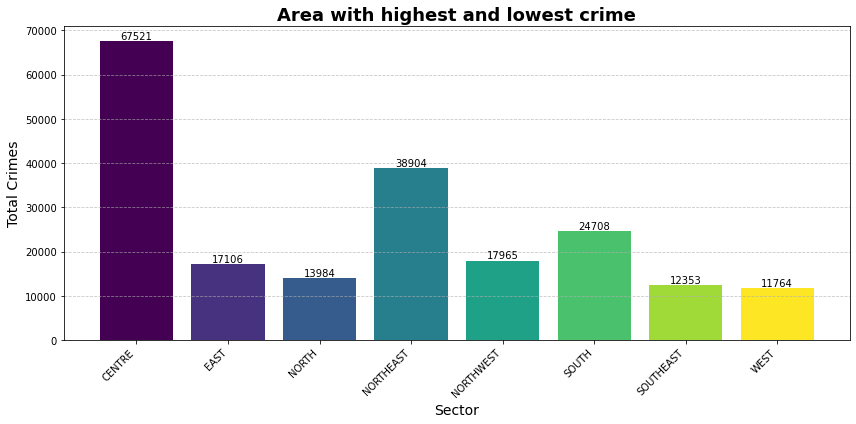

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(crime_by_sector)))

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(crime_by_sector.index, crime_by_sector, color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Area with highest and lowest crime', fontsize=18, fontweight='bold')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('Area with highest crime and lowest.png', format='png', dpi=300)
plt.show()

The bar chart above shows the sectors with the total crimes count per sector. As seen above, the CENTRE has the highest crime count with 67521 and WEST with the lowest crimes count of  11764 crimes 

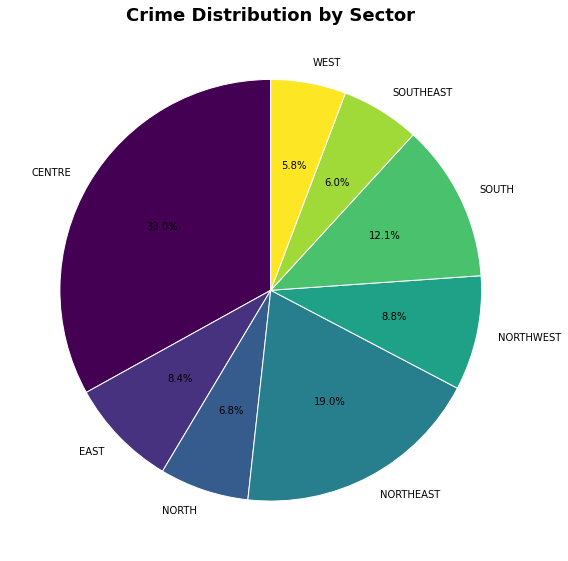

In [49]:
# Creating a pie chart to visualize the percentages.

plt.figure(figsize=(8, 8))
plt.pie(crime_by_sector, labels=crime_by_sector.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title('Crime Distribution by Sector', fontsize=18, fontweight='bold')
plt.tight_layout()

plt.savefig('Crime_Distribution_by_Sector.png', format='png', dpi=300)

plt.show()

#### Determine which community has the highest crime for particular sector.
There are over 200 communities in Calgary in each sector of the city
Lets analyze the crime count in the communities in the CENTRE since it has the highest crime count.

In [50]:
# Filtering the dataset for the CENTRE

sector_filter = 'CENTRE'
filtered_crime_count = community_crimes_sectors[community_crimes_sectors['Sector'] == sector_filter]

# Grouping by 'community' and summing the 'crime count' for that sector
crime_count_by_community_in_sector = filtered_crime_count.groupby('Community')['Crime Count'].sum().reset_index()

print(crime_count_by_community_in_sector)

                    Community  Crime Count
0                    ALTADORE         1051
1            ALYTH/BONNYBROOK          578
2                 BANFF TRAIL         1325
3                    BANKVIEW         1490
4                    BEL-AIRE           57
..                        ...          ...
56                TUXEDO PARK         1659
57          UPPER MOUNT ROYAL          420
58             WEST HILLHURST         1245
59               WINDSOR PARK         1087
60  WINSTON HEIGHTS/MOUNTVIEW         1024

[61 rows x 2 columns]


#### Data visualization
Lets visualize the above crimes count for each communities in the CENTRE

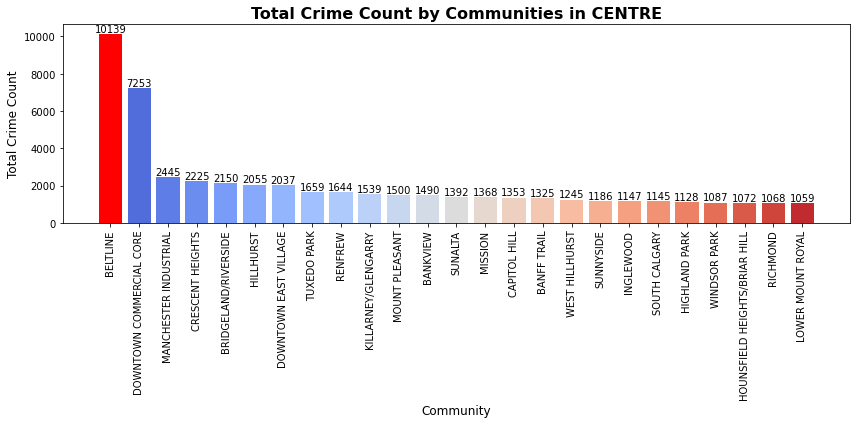

In [11]:
import seaborn as sns

# Selecting the top 25 communities
crime_count_by_community_in_sector = crime_count_by_community_in_sector.sort_values(by='Crime Count', ascending=False).head(25)

colors = sns.color_palette("coolwarm", len(crime_count_by_community_in_sector))

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(crime_count_by_community_in_sector['Community'], crime_count_by_community_in_sector['Crime Count'], color=colors)

plt.title(f'Total Crime Count by Communities in {sector_filter}', fontsize=16, weight='bold')
plt.xlabel('Community', fontsize=12)
plt.ylabel('Total Crime Count', fontsize=12)

plt.xticks(rotation=90)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 5, f'{int(height)}', ha='center', va='bottom', color='black', fontsize=10)

# Highlight the community with the highest crime count
highest_crime = max(crime_count_by_community_in_sector['Crime Count'])
highest_community = crime_count_by_community_in_sector['Community'][crime_count_by_community_in_sector['Crime Count'] == highest_crime].values[0]
plt.bar(highest_community, highest_crime, color='red')

plt.tight_layout()
plt.savefig('Top_20_Crime_Count_by_Community_in_NW_Enhanced.png', format='png', dpi=300)
plt.show()


The bar graph above represents the total crime count in each communities that is in the sector "CENTRE". As shown above "BELTLINE" community has the highest crime rate of  10139 count. The other communities are also shown in the dataset.

#### Data Visualization 
The below heat map highlights the crime count of each category of crimes that occured in the every sector of calgary.

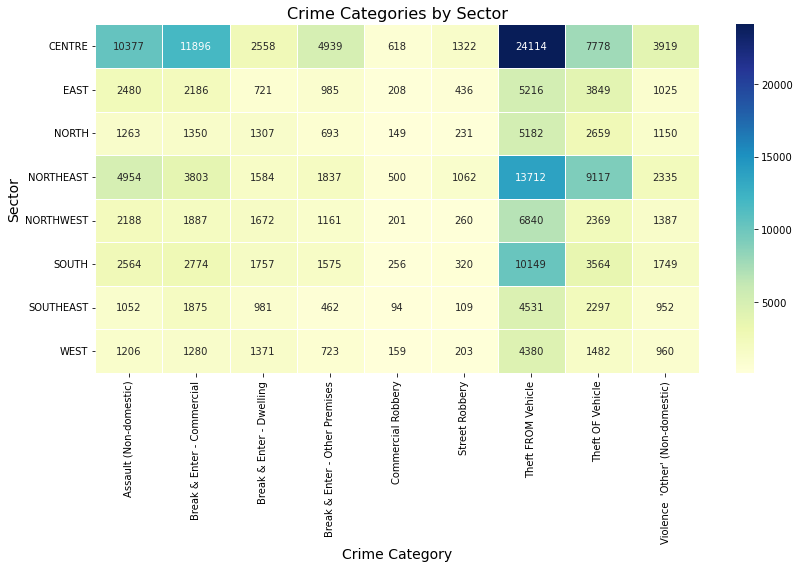

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'crime_by_category_sector' is the DataFrame where sectors are rows and crime categories are columns
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(crime_by_category_sector, annot=True, fmt='g', cmap='YlGnBu', linewidths=.5, cbar=True)

plt.title('Crime Categories by Sector', fontsize=16)
plt.xlabel('Crime Category', fontsize=14)
plt.ylabel('Sector', fontsize=14)

plt.tight_layout()
plt.savefig('heatmap_crime_category_by_sectors.png', format='png', dpi=300)

plt.show()

### Question 2: What  are the most common and least common types of crimes?
It is important to gain insights on the most common crimes within the city. This could
help residents take proactive steps to protect themselves. For example, people can decide to improve their vehicle's security systems and adopt safer parking techniques in public areas if they believe that vehicle theft is a serious problem. Furthermore, knowing which crimes are least common can ease some anxieties about certain dangers, enabling a more balanced perspective of safety in the city. Lastly, it mightinfluence government policies regarding public safety. For instance, if theft from a vehicle was the most common crime, they would invest in programs that prevent vehicle crimes. 

In [30]:
# Sort, count and list the crimes in descending order
sorted_crime_counts_desc = crime_counts.sort_values(ascending=False)
sorted_crime_counts_desc


Category
Theft FROM Vehicle                  74124
Theft OF Vehicle                    33115
Break & Enter - Commercial          27051
Assault (Non-domestic)              26084
Violence  'Other' (Non-domestic)    13477
Break & Enter - Other Premises      12375
Break & Enter - Dwelling            11951
Street Robbery                       3943
Commercial Robbery                   2185
Name: Crime Count, dtype: int64

In [37]:
#Calculate the percentages of most and least common types crime out of the total crime counts.
total_count_crime = crime_counts.sum()
#most common crime percentage
most_common_crimepercent =(crime_counts.max()/total_count_crime)*100
#least common crime percentage
most_least_crimepercent =(crime_counts.min()/total_count_crime)*100

most_common_crime_percentage, least_common_crime_percentage

(36.281050390347765, 1.0694794547367905)

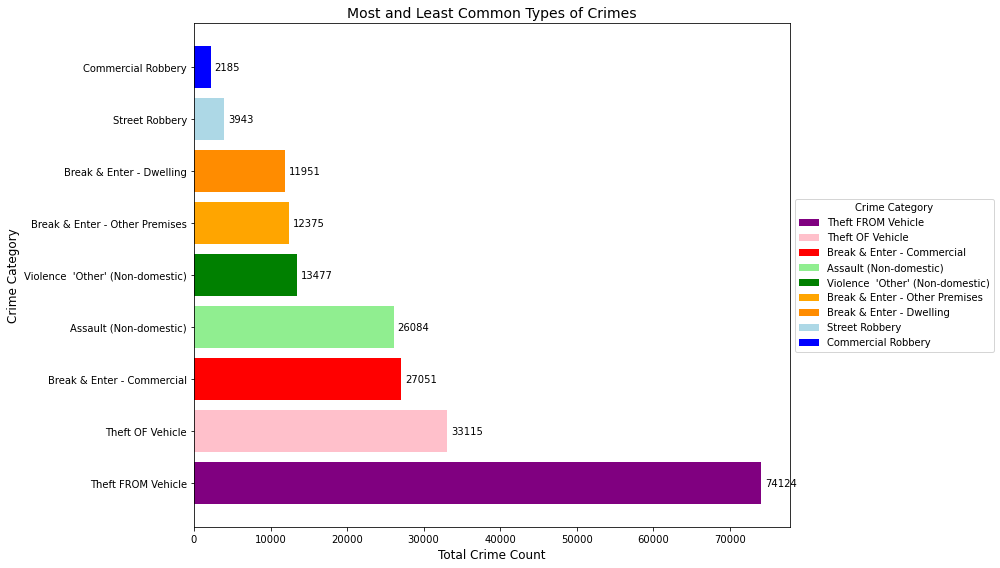

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#sorting the data
sorted_crime_counts_desc = crime_counts.sort_values(ascending=False)
#bar chart figures
plt.figure(figsize=(14, 8))

#declaring the colors in the chart
colors = ['purple', 'pink', 'red', 'lightgreen', 'green', 'orange', 'darkorange', 'lightblue', 'blue']

# Create a horizontal bar chart
bars = plt.barh(sorted_crime_counts_desc.index, sorted_crime_counts_desc.values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', color='black', fontsize=10)

#adding a legend to the bar chart
legend_labels = sorted_crime_counts_desc.index.tolist()
plt.legend(bars, legend_labels, title="Crime Category", loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Most and Least Common Types of Crimes', fontsize=14)
plt.xlabel('Total Crime Count', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


The bar chart above shows a visual representation of most common and least common type of crimes in Calgary. 
The most common type of crime identified in the chart is **Theft FROM Vehicle** with a total count of 74,124  which is **36%** of the total crime count in the dataset
The least common type of crime identified in the visualization is **Commercial Robbery** which represents a count of 2,185 about **1.07%**  of the total crime count in the city.

#### Identifying the most common and the least common type of crime per sector
It's important to look at the most common and the least common types of crimes which are  **Theft FROM Vehicle** and **Commercial Robbery** respectively per sector. Analyzing the counts of these crimes per sector would not only create public awareness about the crimes in each sector but also help alot government resources effectively to combat these crimes.
Below is a visual representation of most common and the least common type of crime per sector

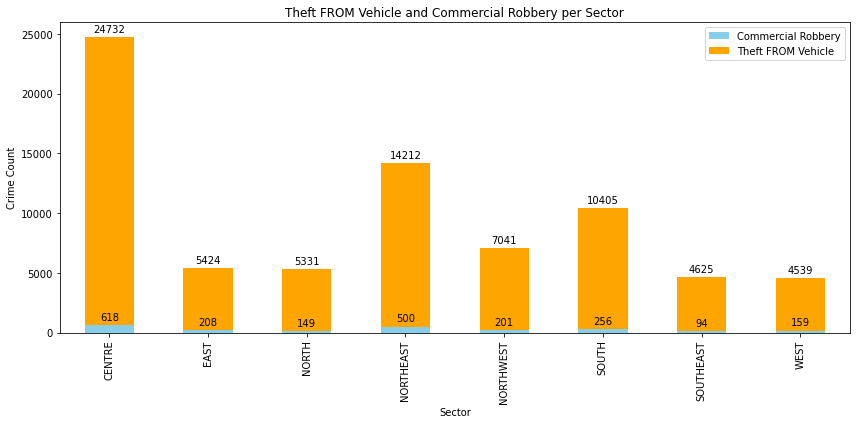

In [47]:

# Filter the data for Theft FROM Vehicle and Commercial Robbery
theft_from_vehicle = data[data['Category'] == 'Theft FROM Vehicle']
commercial_robbery = data[data['Category'] == 'Commercial Robbery']

# Group by Sector and sum the Crime Count
theft_from_vehicle_per_sector = theft_from_vehicle.groupby('Sector')['Crime Count'].sum()
commercial_robbery_per_sector = commercial_robbery.groupby('Sector')['Crime Count'].sum()


combined_data = pd.DataFrame({
    'Commercial Robbery': commercial_robbery_per_sector,
    'Theft FROM Vehicle': theft_from_vehicle_per_sector
}).fillna(0)

# Plot the data in stacked bar chart
ax = combined_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])

# Set chart titles and labels
ax.set_title('Theft FROM Vehicle and Commercial Robbery per Sector')
ax.set_xlabel('Sector')
ax.set_ylabel('Crime Count')


for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)  # Position labels above the bars with slight padding

# Display the chart
plt.tight_layout()
plt.show()

From the above visualization, the most common type of crime that is **Theft FROM Vehicle** is highest in the **CENTER** with 24,732 counts and lowest in the **WEST** with 4,539 counts while the least common type of crime is common which is **Commercial Robbery** is the highest in **CENTER** with 618 counts and lowest in **SOUTHEAST** with 94 counts.